Please note that I used the TA notes and the code provided in the hints to complete my assignement - 

In [1]:
import numpy as np
import math
import pandas as pd
import scipy.spatial.distance as dis
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy.random as rand
import scipy.stats as stats
import scipy.misc as misc
import collections
import pylab
import scipy

In [2]:
Wiggins_data=pd.read_csv('w05-data.tbl',header= None , index_col= False ,names = ['cell_nb', 'type', 'caraway','kiwi'], skiprows=1,sep="\s+")

In [3]:
#Wiggins_data

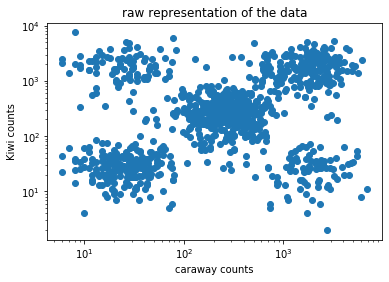

In [4]:
coordinate_x=list(Wiggins_data['caraway'])
coordinate_y=list(Wiggins_data['kiwi'])
cell_number=list(Wiggins_data['cell_nb'])
real_clusters=list(Wiggins_data['type'])
plt.scatter(coordinate_x,coordinate_y)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.title('raw representation of the data')
plt.xlabel('caraway counts')
plt.ylabel('Kiwi counts')
plt.show()

In [5]:
#list to store the data point(x-cataway,y-kiwi)
coords = []
for index in range(Wiggins_data.shape[0]):
    coords.append([Wiggins_data.iloc[index][2],Wiggins_data.iloc[index][3]])
coords = np.array(coords)

In [6]:
#coords
#check

array([[1475,   16],
       [  49,  295],
       [ 229,  170],
       ...,
       [  35,    7],
       [  31,   24],
       [1783,   23]])

In [7]:
def assignment(coords, centers):
    total_square_distance =0
  # Assign each point to the closest center
    clusters =  [np.argmin([math.sqrt((point[0]-i[0])**2+(point[1]-i[1])**2) for i in centers]) for point in coords]
   # record the distance between a point and its closet center
    distances = [np.min([math.sqrt((point[0]-i[0])**2+(point[1]-i[1])**2) for i in centers]) for point in coords]
   # Count how many points in each cluster
    c = collections.Counter(clusters)
   # Look for empty clusters
    for x in set(range(len(centers))).difference(set(c.keys())):
        clusters, distances =  assign_empty(x, clusters, distances)
   # calculate the total squared distance
    for i in distances:
        total_square_distance = total_square_distance+i**2
    return (clusters,total_square_distance)

In [7]:
def assign_empty(c, clusters, distances):
   # find index of point furthest from its assigned center
    max_idx = np.argmax(distances)
   # set distances at that index to 0
    distances[max_idx] = 0
   # set clusters at that index to empty cluster
    clusters[max_idx] = c
    return clusters, distances

In [8]:
def update(coords, clusters, num_clust):
    coords = np.asarray(coords)
   # Find indices of each point assigned to each cluster
    clusters_indice = ([np.where(np.asarray(clusters) == x) for x in range(num_clust)])
   # Average position of each point assigned to each cluster to get the updated centroids
    centers = [np.mean(coords[clusters_indice[x]],0) for x in range(len(clusters_indice))]
    return centers

In [9]:
def visualize_data(data, mu, C):
    N, G  = np.shape(data)
    Q, G2 = np.shape(mu)
    assert G == G2
    assert len(C) == N
   # We can assign colors to up to Q=10 components. If you want more, add more.
    colormap = ['xkcd:orange', 'xkcd:olive',     'xkcd:azure',    'xkcd:rose', 'xkcd:mustard',
               'xkcd:peach',  'xkcd:turquoise', 'xkcd:lavender', 'xkcd:rust', 'xkcd:red']
    fig, ax = plt.subplots()
    for i in range(N):
        edgecolor = colormap[ C[i]]
        fillcolor = 'w'
        shape     = 'o'
        ax.loglog( data[i,0], data[i,1], marker=shape, mec=edgecolor, mfc=fillcolor, mew=1.5)
    for q in range(Q):
        ax.loglog(mu[q,0], mu[q,1], '*k', ms=10)
    ax.set_xlabel('caraway (counts)')
    ax.set_ylabel('kiwi (counts)')

In [10]:
n_runs = 20
# Initalize best clusters
min_distance = float('inf')
clusters_best = []
distance_reccords=[]
for i in range(n_runs):
    print('run number',i+1) #keep track
    coords_x = [c[0] for c in coords]
    coords_y = [c[1] for c in coords]
    centers_x = np.random.choice(np.linspace(min(coords_x),max(coords_x),1000),5)
    centers_y = np.random.choice(np.linspace(min(coords_y),max(coords_y),1000),5)
    centers = [[centers_x[i], centers_y[i]] for i in range(0,5)]
   # Start with empty clusters
    clusters_old = []*len(coords)
    clusters = [0]* len(coords)
    while clusters != clusters_old:
       # Update clusters
       clusters_old = clusters
       # New Assignment
       clusters,total_sqdist = assignment(coords, centers)
       # New centers
       centers = update(coords, clusters, 5)
    distance_reccords.append(total_sqdist)
   # Save clusters and centers if it has minimal sum distance to date
    if total_sqdist < min_distance:
        min_distance = total_sqdist
        centers_best = centers
        clusters_best = clusters

run number 1
run number 2
run number 3
run number 4
run number 5
run number 6
run number 7
run number 8
run number 9
run number 10
run number 11
run number 12
run number 13
run number 14
run number 15
run number 16
run number 17
run number 18
run number 19
run number 20


In [11]:
c_cluster_kmeans= collections.Counter(clusters_best)
total_nb_cells=sum(c_cluster_kmeans.values()) #this is 1000
for key,value in c_cluster_kmeans.items(): 
    print ('the proportion of cell type number',key,'is')
    print(value/total_nb_cells)
for i in range(0,len(centers_best)):
    print('the cell type number', i,'has the following means')
    print('x mean',centers_best[i][0])
    print('y mean',centers_best[i][1])

the proportion of cell type number 4 is
0.121
the proportion of cell type number 2 is
0.657
the proportion of cell type number 3 is
0.072
the proportion of cell type number 0 is
0.038
the proportion of cell type number 1 is
0.112
the cell type number 0 has the following means
x mean 4212.736842105263
y mean 1416.078947368421
the cell type number 1 has the following means
x mean 365.63392857142856
y mean 1777.0982142857142
the cell type number 2 has the following means
x mean 240.24048706240487
y mean 214.39421613394217
the cell type number 3 has the following means
x mean 1601.3472222222222
y mean 3273.9166666666665
the cell type number 4 has the following means
x mean 2122.1735537190084
y mean 622.8842975206611


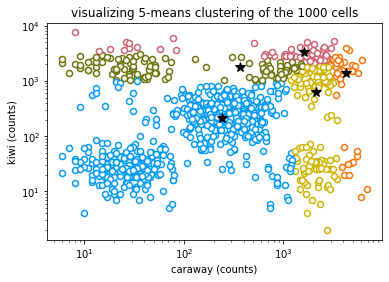

In [12]:
visualize_data(np.array(coords), np.array(centers_best), clusters_best)
plt.title('visualizing 5-means clustering of the 1000 cells')
plt.show()

In [13]:
print(min_distance) #this is the value Wiggins obtained - 
print(max(distance_reccords)) #the distance obtained in the 'worst' run is 437817304.6.

405505778.49834037
439114830.36433756


Why is K-means clustering producing this result, when there
are clearly five distinct clusters in the data?
what is happening is that this k-means algorithm only converges to a local minimum and not to a global minimum-Thereforethe produced clustering is bias 
The reason we can affirm that is bias is because we actually have access to the 'real' cell type so we could compare and see what is the proportion of each cell type obtain and how close is this to the 'real' one and then we could also so a actual vs predicted plot.
But unfortunatly i dont have time to show the results here- but just comparing this to the figure 2 obtained in the homework -or even just bear eyes in the raw data plot -we can see that there is something wrong with this Kmean algoritms

# part 2 - mixture negative binomial fitting

posterior matrix - each row is one cell (1000) in total and each col is 1 comopenement (5 in total)
so we have a 5*1000 matric 
each element of the matrix is a posterior probablity -example if we want the proablity of the cell c19 to be in the cluster 1 - 
again this is different from kmeans- 
we first calcualte the probablity of this point to be part of each cluster and then we assign the cluster that maximize this probablity 

In [15]:
def expectation(coords, mus, sigma, mix_coeffs):
    #this function returns the posterior probablity and the clusters - the clusters are obtained by selecticting the index of the maximum posterior probablity 
    
    # Initialize P(q|x)
    Pqx = [] 
    
    # Loop through points(data point)
    for point in coords: 
        # Append the probability that the point is generated by each component: pi * P(x|θ_q) 
        #we use a negative binomial scipy.stats.nbinom.logpmf(y,n,p) with n=1/dispertion and p=1/(1+mu*disperation )
        possibility_list=[]
        for i in range (5):
            prob_x=stats.nbinom.logpmf(point[0],1/phi,1/(1+mus[i][0]*phi))
            prob_y=stats.nbinom.logpmf(point[1],1/phi,1/(1+mus[i][1]*phi))
            possibility_list.append(mix_coeffs[i] * (np.e**(prob_x+prob_y)))
        
        #'Pqx.append 
         
        Pqx.append(possibility_list)         
            
    # Normalize to obtain the posterior probability that each data point comes from each component
    #'posts = [(x divided by sum of all x) for each point x in Pqx]'
    posts = [[Pqx[a][b]/sum(Pqx[a]) for b in range(0,5)] for a in range(len(Pqx))]    
    
    # Assign clusters based on max posterior probability
    #'clusters = [(index for the largest posterior p) for posterior p in posts]'
    clusters = [pos.index(max(pos)) for pos in posts]
        
    
    return posts, clusters

In [22]:
def maximization(coords, posts, mix_coeffs):
    
    n_mu=[[0,0],[0,0],[0,0],[0,0],[0,0]] #numerator (x,y) pairs for 5 component q
    d_mu=[[0,0],[0,0],[0,0],[0,0],[0,0]]  #denominator initialization (x,y) pairs for 5 component q
    mus = [[0,0],[0,0],[0,0],[0,0],[0,0]] #(x,y) pairs for 5 component q- this is what we want to udapte 
    mix_coeffs=[0,0,0,0,0] #one per component q

    # calculate the new means for each component q(x and y means)
        

    
    for i in range(5):
        # we can first calculate the numerator
        #'numinator_mu = sum of each column([(posterior probs of x)*x(the count value ) for point x in coords)])'
        n_mu[i][0]=sum([posts[idx][i]*coords[idx][0] for idx in range (1000)])
        n_mu[i][1]=sum([posts[idx][i]*coords[idx][1] for idx in range (1000)])
        # now we'll calculate the denominator
        
        
        #'denominator_mu = sum of each column(posts)'
        d_mu[i][0]=sum([posts[idx][i] for idx in range (1000)])
        d_mu[i][1]=sum([posts[idx][i] for idx in range (1000)])
        # divide the numerator by denominator to get the weighted means
        #'mus = numerator_mu / denominator_mu'
        mus[i][0]=n_mu[i][0]/d_mu[i][0]
        mus[i][1]=n_mu[i][1]/d_mu[i][1]
        
    #  new mixture coefficients (there will be 5 in total)
    
    # remember that the updated mixture coefficients π are the expected fraction of data points assigned to each component
    #'mix_coeffs = sum of each column(posts) / the number of points N'
    for i in range(5):
        mix_coeffs[i]=sum([posts[idx][i] for idx in range(1000)])/1000
    
    return mus, mix_coeffs

the negative ll serve to choose what is the best fit (out of the 10 runs)-later in this pset

In [17]:
def negll(coords, mus, sigma, mix_coeffs):
    # Compute the nll as the normal logpdf of the data, given mu and sigma, plus the log of the mixture coefficient
    Pqx=[]
    phi=0.3
    n=1/phi
    for point in coords:
        logpdf=[] #reinitalise 
        for i in range(5):
            probability_x=stats.nbinom.logpmf(point[0],n,1/(1+mus[i][0]*phi))
            probability_y=stats.nbinom.logpmf(point[1],n,1/(1+mus[i][1]*phi))
            
            logpdf.append(mix_coeffs[i] * (np.e**(probability_x+probability_y))) #we can do that because we ASSUME THAT X AND Y ARE INDEPENDANT (which might not be the case)
        Pqx.append(logpdf)
    
    
    #now lets actually get the negative ll 
    ll=0 #initialise 
    for i in range(1000):    
        ll=ll+np.log(sum([Pqx[i][j] for j in range(5)]))
    return -ll

Please note that the following chunk might be slow to run - sorry 
i printed the run numbers in the console so you can have an idea of how long it takes to run and how many permuations are made

In [18]:

# Define number of times we'll run the EM algorithm, number of clusters (num_clust), and phi
n_runs = 10 #this can be changed (the higher the number the longest it will actually take to run )
num_clust = 5
phi = 0.3

# define a threshold for nll change that will stop iteration (nll_thresh)
#rhia can be changed (depending on the accruacy that we want to achieve )
nll_thresh = .001

# Sigma calculated from phi
sigma = math.sqrt (1/(2*phi)) 

# initialise (mus_best),(min_dist), mix_coeffs_best,nll_best

 # and intialize as starting best nll (nll_best) 
mus_best = []*len(coords)
nll_best = float('inf')
mix_coeffs_best = []
min_dist = float('inf') #previous execrice
for i in range(n_runs):
    print('run number',i+1) #keep track 
    
 # regenerate random (mus) with and random (mix_coeffs)
    coords_x = [point[0] for point in coords]
    coords_y = [point[1] for point in coords]
    mus_x = np.random.choice(np.linspace(min(coords_x),max(coords_x),1000),num_clust)
    mus_y = np.random.choice(np.linspace(min(coords_y),max(coords_y),1000),num_clust)
    mus = [[mus_x[i], mus_y[i]] for i in range(num_clust)] 
    
    mix_coeffs = rand.rand(num_clust)
    mix_coeffs = np.divide(mix_coeffs,sum(mix_coeffs))
    
    
    # We will iterate until the nll stops changing muc
    # Here we initialize holder variables for the last nll and the difference between the current and last nll
    nll_diff = float('inf')
    nll_old = float(0)    
    
    # Iterate while the differnece between consecutive nlls is above a threshold
    while nll_diff > (nll_thresh* nll_old):
        
        # Calculate posterior probabilities and assign points to clusters
        posts,clusters = expectation(coords, mus, sigma, mix_coeffs)
        
        # Calculate new mus and mixture coefficients given current posterior probabilities
        mus, mix_coeffs = maximization(coords, posts, mix_coeffs)    
        
        # Calcualte the nll of hte current mixture model
        nll = negll(coords, mus, sigma, mix_coeffs) 
         
        # find difference in consecutive nlls and update the nll_old
        nll_diff = abs(nll-nll_old)
        nll_old = nll
        
    # Update best estimates for mus, mixture coefficients and cluster assignments
    if nll < nll_best:
        print('permutation')
        mix_coeffs_best = mix_coeffs
        nll_best = nll
        mus_best = mus
        clusters_best = clusters

run number 1
permutation
run number 2
run number 3
run number 4
run number 5
run number 6
run number 7
permutation
run number 8
run number 9
run number 10


In [23]:
#check #to check this part the dimension are really helful too (helped me to see if the thing i was calculting was what i expdected )
#print(clusters_best)
#print(mus_best)
#print(nll_best)
#print(mix_coeffs_best)

What are the estimated mean expression levels of Caraway and Kiwi in the five cell types, and the relative
proportions of each cell type in the 1000 cells?

In [24]:
c_cluster_binomial = collections.Counter(clusters_best)
total_nb_cells=sum(c_cluster_binomial.values()) #this is 1000
for key,value in c_cluster_binomial.items(): 
    print ('the proportion of cell type number',key,'is')
    print(value/total_nb_cells)
for i in range(0,len(mus_best)):
    print('the cell type number', i,'has the following means')
    print('x mean',mus_best[i][0])
    print('y mean',mus_best[i][1])

the proportion of cell type number 1 is
0.089
the proportion of cell type number 3 is
0.412
the proportion of cell type number 2 is
0.202
the proportion of cell type number 4 is
0.209
the proportion of cell type number 0 is
0.088
the cell type number 0 has the following means
x mean 30.172817021939785
y mean 2041.3730749045014
the cell type number 1 has the following means
x mean 2131.5376624549913
y mean 28.08196578276196
the cell type number 2 has the following means
x mean 30.84705777058334
y mean 30.83511581749832
the cell type number 3 has the following means
x mean 295.8143740511752
y mean 292.49100543898567
the cell type number 4 has the following means
x mean 1950.3672982105247
y mean 1888.603382348721


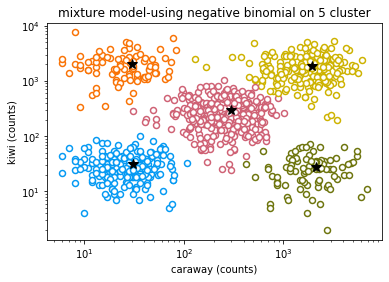

In [25]:
visualize_data(np.array(coords), np.array(mus_best), clusters_best)
plt.title('mixture model-using negative binomial on 5 cluster')
plt.show()

this plot obtained is very similar to the one obtained in the figure 2 of the homework and more what we sould exepct- 
once again i would have caluclated the residual etc with this model to asses how well is it doing compared to the other one>

# part 3 - simple fix for k means


 for this question I choose to transform the point coordinates directly in the first part to be log coordinates and redo the exact same process on the data - 

In [26]:
#list to store the data point(x-cataway,y-kiwi)
coords = []
for index in range(Wiggins_data.shape[0]):
    x_log= np.log(Wiggins_data.iloc[index][2])
    y_log= np.log(Wiggins_data.iloc[index][3])
    coords.append([x_log,y_log])
coords = np.array(coords)

In [27]:
n_runs = 20
# Initalize best clusters
min_distance = float('inf')
clusters_best = []
distance_reccords=[]
for i in range(n_runs):
    print('run number',i+1) #keep track
    coords_x = [c[0] for c in coords]
    coords_y = [c[1] for c in coords]
    centers_x = np.random.choice(np.linspace(min(coords_x),max(coords_x),1000),5)
    centers_y = np.random.choice(np.linspace(min(coords_y),max(coords_y),1000),5)
    centers = [[centers_x[i], centers_y[i]] for i in range(0,5)]
   # Start with empty clusters
    clusters_old = []*len(coords)
    clusters = [0]* len(coords)
    while clusters != clusters_old:
       # Update clusters
       clusters_old = clusters
       # New Assignment
       clusters,total_sqdist = assignment(coords, centers)
       # New centers
       centers = update(coords, clusters, 5)
    distance_reccords.append(total_sqdist)
   # Save clusters and centers if it has minimal sum distance to date
    if total_sqdist < min_distance:
        print('permuation')
        min_distance = total_sqdist
        centers_best = centers
        clusters_best = clusters

run number 1
run number 2
run number 3
run number 4
run number 5
run number 6
run number 7
run number 8
run number 9
run number 10
run number 11
run number 12
run number 13
run number 14
run number 15
run number 16
run number 17
run number 18
run number 19
run number 20


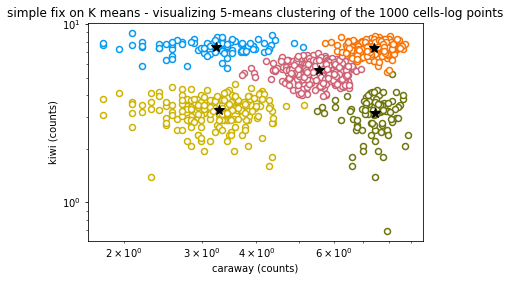

In [28]:
visualize_data(np.array(coords), np.array(centers_best), clusters_best)
plt.title('simple fix on K means - visualizing 5-means clustering of the 1000 cells-log points')
plt.show()

this looks more reasonable to me - again one way to asses how well is it is to compare with the 'real' graph 

In [30]:
#print(min_distance) #this is the value better than the value W obtained - we are taking the distance of the log element 
#print(max(distance_reccords)) #the distance obtained in the 'worst' run is 1332.0093416689542